# AAV TP 2 : Calcul et analyse de la fondamentale
# le 24/05/2024

## 0. Préparation
- Lire le sujet de ce TP et préparer des questions, si besoin.
- Relire vos comptes-rendus de TP du deuxième semestre de 3A en signal.
- Écrire le code de la question « Lecture d'un signal audio ».
- Écrire l'algorithme (en français) de la question « Découpage en
  fenêtres d'analyse ».

La fonction d'autocorrélation d'un signal temporel $f(t)$ est définie comme :

$R_f(\tau) = \int_{-\infty}^{\infty}f(t)f^*(t-\tau)dt$ .

La figure ci-dessus illustre le calcul de l'autocorrélation.



- Interprétez-la. Pour la valeur de $\tau$ montrée dans la figure, à quoi
  correspondrait $R_f(\tau)$ ?

<span style="color:blue">
    L'axe horizontal représente les différents décalages temporels τ , l'axe vertical représente les valeurs de l'autocorrélation $R_f(\tau)$ en fonction de τ c'est l'air en dessous de la courbe (gris)
</span>   

- Calculez à la main la fonction d'autocorrélation de $f(t) = \sin(2\pi
  f_0t)$, et tracez le résultat.
- En déduire sur la courbe comment retrouver $f_0$.

<span style="color:blue">
La corrélation permets de mesurer la ressemblance entre deux signaux. Dans notre cas les deux signaux sont identiques. L'autocorrélation atteinds son max lorsque les signaux sont parfaitement supperposés (τ = 0). Pour retrouver le f0 sur la courbe, il faudrait trouver le decalage >0  correspondant au plus grand pic. Cela correspond à la perdiode fondamentale, ensuite il suffit de prendre l'inverse pour l'avoir en Hz( τ =  𝑇0  =1/ 𝐹0).
</span>  

- Comment s'en servir pour déterminer la fréquence fondamentale d'un
  signal de parole ?

<span style="color:blue">
Dans le domaine de l'analyse de la parole, la fréquence fondamentale d'un signal peut être obtenue en calculant son autocorrélation. En examinant le graphique de l'autocorrélation τ, on peut repérer la période du signal en mesurant la distance entre les pics successifs de cette fonction. Cette période correspond à l'inverse de la fréquence fondamentale $f_0$ du signal. Ainsi, en identifiant la période entre les pics, on peut déterminer la fréquence fondamentale du signal de parole.
</span> 

## I. Les signaux
En utilisant Praat, enregistrez les deux phrases
suivantes à une fréquence d'échantillonnage de 16 kHz, en mono :
- « Emmanuel est là-bas. » (ton affirmatif)
- « Emmanuel est là-bas ? » (ton interrogatif)

Vérifiez si Praat arrive bien à calculer le $F_0$.  Si les signaux sont de
mauvaise qualité, enregistrez-les de nouveau. Enlevez les périodes de
silence au début et à la fin du signal. Sauvez les signaux dans des
fichiers appelés *aff.wav* et *int.wav*, respectivement.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
# %matplotlib notebook

## II. Lecture d'un signal audio
1. Utilisez la fonction *wavfile.read()*
pour lire un des fichiers que vous avez enregistré.
Visualisez le signal par rapport au temps (en s) avec la commande *plt.plot()*.

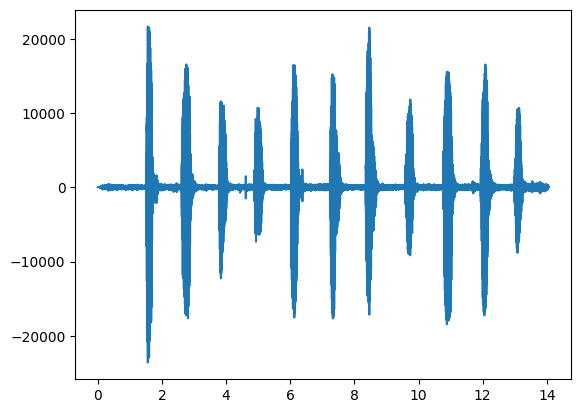

In [5]:
# help(wavfile.read)

Fe,Pron = wavfile.read("Prononciation.wav")


t = np.linspace(0,1/Fe*len(Pron),len(Pron))


plt.figure()
plt.plot(t,Pron)
plt.show()







## III. Découpage en fenêtres d'analyse
1. Écrivez une fonction qui découpe le signal en fenêtres d'analyse.

In [19]:
Algorithme de la fonction de decoupage en francais
#debut de la premiere fenetre d1 = 0
#fin de la premiere fenetre f1 = width
#Premiere fenetre =  signal[d1:f1:1/sample_rate]
#debut de la deuxieme fenetre d2 = d1 + d1*(1-overlap)
#fin de la deuxieme fenetre f2 = d2 + width*sample_rate = d1 + d1*(1-overlap) + width*sample_rate
#Deuxieme fenetre = signal [d2:f2:1/sample_rate]
#Debut fenetre 3 d3 = d2 - d2*(1-overlap) = d1 + d1*(1-overlap) - (d1+d1*(1-overlap))(1-overlap) 


#Calcul du nombre de fenetres à partir de leur tail,le recouvrement et longueur du signal
#Creation d'une matrice nulle N*M avec N le nombre de fenetre calculées et M la taille de la fenetre
#initialisation du debut de la premiere fenetre di = 0
#concatenation du signal, de maniere a voir un vecteur circulaire
# Parcourir une boucle for allant de 0 à N
#Pour chaque fenetre : 
#   Prendre dans le signal concatene : le debut di et la fin correspondant à di+largeur de la fenetre
#   Affecter ce vecteur coupé dans la matrice finale à sa position
#   Calcul de l'indice de debut de la prochaine fenetre en ajoutant au debut precedant (1-recouvrement)*largeur_de_la_fenetre


In [7]:
def windowing (signal, sample_rate, width, overlap):
    """
    Découpe le signal en fenêtres d'analyse de courte durée.
    
    Paramètres
    ----------
    signal: array Numpy contenant le signal à découper
    sample_rate: fréquence d'échantillonnage, en Hertz
    width: la largeur de la fenêtre, en secondes
    overlap: proportion de recouvrement entre deux fenêtres successives, entre 0 et 1
    
    Renvoie
    -------
    windows: array Numpy à deux dimensions, le nombre de ligne est le nombre de fenêtres découpées,
                                            le nombre de colonnes la largeur d'une fenêtre en points
    """

    s = np.concatenate((signal,signal)) #Concatener le signal avec lui meme afin de pouvoir realiser le plus de fenetres possibles(la derniere fenetre si incomplete prend les elements manquants dans le debut du signal)
    
    n_win = int((len(signal)-sample_rate*width) / (width*sample_rate*(1-overlap))+1) #+1  #calcul du nombre de fenetres pouvant etre realisées

    windows = np.zeros((n_win,int(width*sample_rate))) #Initialisation de la matrice en termes de dimensions


    di = 0 #indice du debut de la fenetre, ici, initialisation pour la premiere fenetre

    for i in range(n_win) : 
        wi = s[di:di+int(width*sample_rate)] #fenetre (i)
        windows[i,:] = wi #affectation de la fenetre dans la matrice à son ligné dédiée
        di = di+int((1-overlap)*width*sample_rate) #Calcul de l'indice de debut de la prochaine fenetre
    




    return windows

In [8]:
# win_pron = windowing(Pron,Fe,4,0.5)


# for i in range(np.size(win_pron,0)) : 
#     t = np.linspace(0,1/Fe * len(win_pron[i:,]),len(win_pron[i:,]))
#     plt.plot(t,win_pron[i:,])



2. Vérifiez que la windowing fonctionne correctement.

In [9]:
# s, Fe, w, o = np.arange(99), 1, 10, 0
# w = windowing(s, Fe, w, o)
# print(w)

s, Fe, w, o = np.arange(100), 1, 10, 0.5
w = windowing(s, Fe, w, o)
# print(w[-1]) 

print(w)

# doit renvoyer deux fois plus de fenêtres, les 50% derniers points de la fenêtre N
# doivent être les premiers de la fenêtre N+1




[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [15. 16. 17. 18. 19. 20. 21. 22. 23. 24.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [25. 26. 27. 28. 29. 30. 31. 32. 33. 34.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [35. 36. 37. 38. 39. 40. 41. 42. 43. 44.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [45. 46. 47. 48. 49. 50. 51. 52. 53. 54.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [65. 66. 67. 68. 69. 70. 71. 72. 73. 74.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [75. 76. 77. 78. 79. 80. 81. 82. 83. 84.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [85. 86. 87. 88. 89. 90. 91. 92. 93. 94.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]


In [10]:
np.correlate([1, 2, 3], [0, 1, 0.5], "full")

array([0.5, 2. , 3.5, 3. , 0. ])

## IV. Calcul de l'autocorrélation
1. Écrivez une fonction qui calcule l'autocorrélation sur chaque fenêtre d'analyse, grâce à *np.correlate()* en mode « full » :

In [34]:
def autocorrelation (windows):
    """
    Découpe le signal en fenêtres d'analyse de courte durée.
    
    Paramètres
    ----------
    windows: array Numpy à deux dimensions, le nombre de ligne est le nombre de fenêtres découpées,
                                            le nombre de colonnes la largeur d'une fenêtre en points
    Renvoie
    -------
    R: autocorrélation pour chaque fenêtre d'analyse, array NumPy à deux dimensions
        le nombre de ligne est le nombre de fenêtres découpées,
        le nombre de colonnes est le nombre de points d'une autocorrélation
    L: valeur des décalages en secondes des points de l'autocorrélation, array NumPy à une dimension
        le nombre de points est le nombre de points d'une autocorrélation
    """


    ac = np.correlate(windows[0,:],windows[0,:],mode="full") #Autocorrelation de la premiere fenetre pour determiner la taille du vecteur de correlation produit
    R = np.zeros((np.size(windows,0),len(ac))) #Creation de la matrice qui contiendra les fenetres et leurs autocorrelations correspondantes

    for i in range(np.size(windows,0)) : 
        ac  = np.correlate(windows[i,:],windows[i,:],mode="full") #autocorrelation de chaque fenetre
        R[i,:] = ac #affectation de l'autocorrelation de la fenetre dans la matrice à la ligne dédiée
        
        L=np.linspace(-int(len(ac))/2,int(len(ac)/2),len(ac)) #Creation du vecteurs contenant les points de décalage de l'autocorrelation


    return R, L

2. Vous testerez cette fonction de la manière suivante :

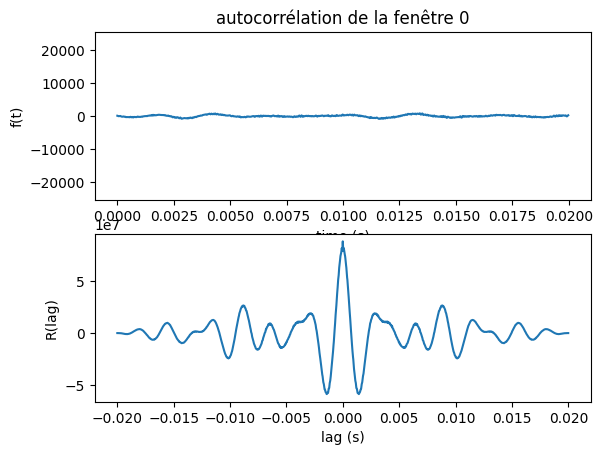

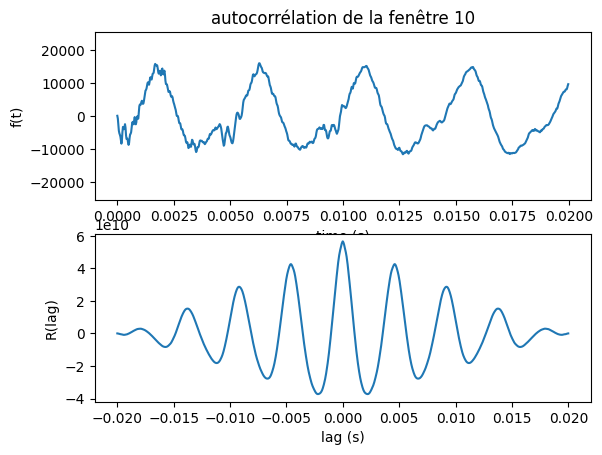

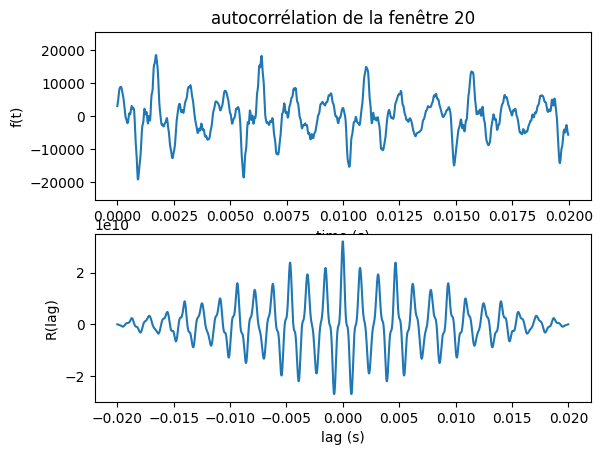

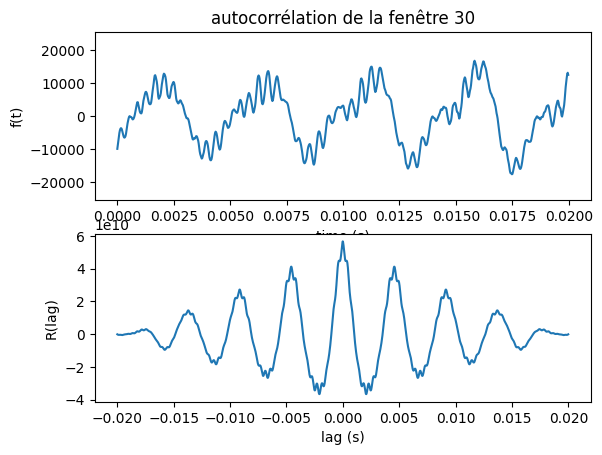

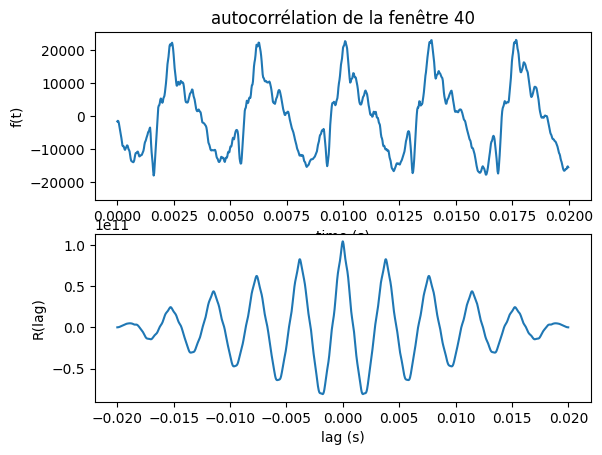

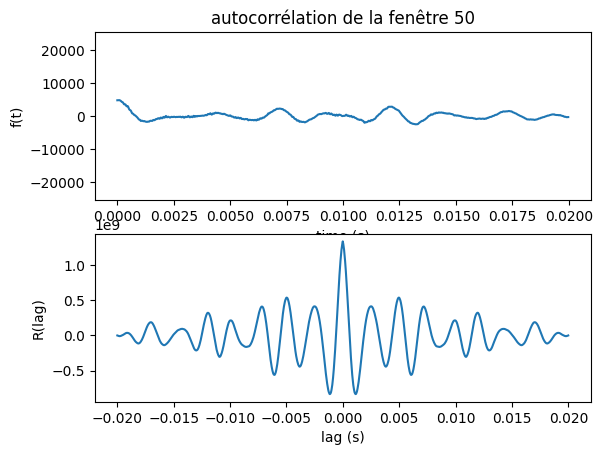

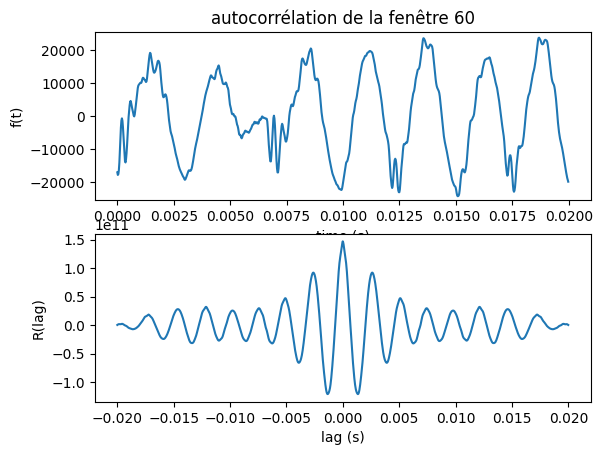

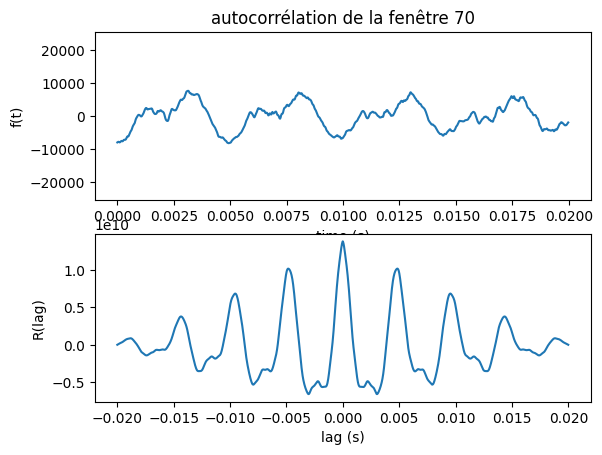

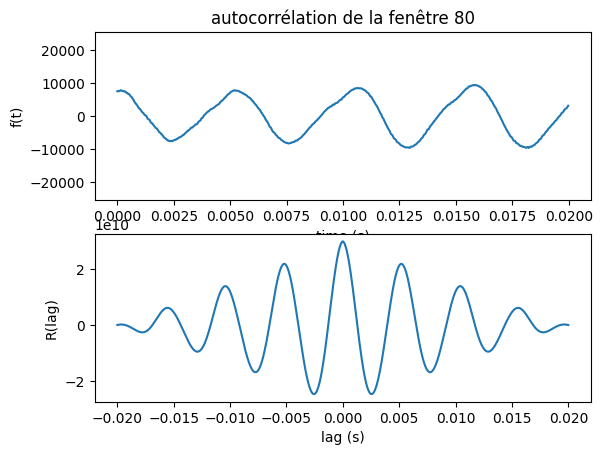

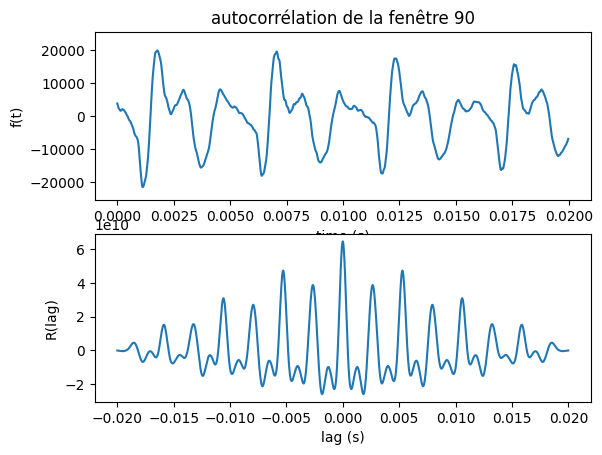

In [35]:
sample_rate, signal = wavfile.read("aff.wav")
width = 0.02
overlap = 0.25


windows = windowing (signal, sample_rate, width, overlap)


ymax = np.max(np.abs(windows))
ns, nr = windows.shape

R, L = autocorrelation(windows)
idx = 0

first_win_idx = 0
step = 10
for idx in range(first_win_idx, ns, step):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot (np.arange(nr) / sample_rate, windows[idx, :])
    plt.ylim ([-ymax, ymax])
    plt.title("autocorrélation de la fenêtre "+str(idx))
    plt.xlabel("time (s)")
    plt.ylabel("f(t)")
    plt.subplot (2, 1, 2)
    plt.plot(L  / sample_rate, R[idx, :])
    plt.xlabel ("lag (s)")
    plt.ylabel ("R(lag)")


3. Donnez une interprétation à ce que vous voyez à l'écran. À quoi correspondent les pics des signaux ?


Le premier graphe de chaque figure correspond à la portion du signal fenetre, donc à la fenetre realisée, le deuxieme graphe correspond à l'autocorrelation de cette fenetre ou portion de signal avec elle meme.

On peut observer qur l'on a toujours le maximum d'autocorrelation à lag = 0, lorsque les signaux correlés sont identiques, où on a donc le maximum d'energie, et de part et d'autre de cette valeur de lag, le sinal s'attenue.
En outre on a un signal symetrique à lag = 0.
En outre sur les signaux de parole, on retrouve bien des signaux periodiques de F0 avec des harmoniques.

4. Donnez des explications aux codes *np.arange(nr)/sample_rate,* et *L/sample_rate*.

 np.arange(nr)/sample_rate permet de creer l'echelle de temps, on recupere le nombre d'echantillons par fenetre, qu'on divise par la frequence d'echantillonage pour avoir le temps en secondes : t = nTe = n/Fe
 L/sample_rate permet de creer l'echelle de decalage.

 Dans la definition de la fonction autocorrelation, on a cree un vecteur L, contenant les decalage en indices allant donc de -N/2 à N/2 avec N, le nombre de points d'autocorrelation calculés.
Ensuite on divise par la frequence d'echantillonage pour avoir les valeurs en seconde.

## V. Obtention de $F_0$
1. En tenant compte des questions précédentes, comment déduire le $F_0$ de la parole en utilisant l'autocorrélation ?

#Pour avoir le F0 a partir de l'autocorrelation, on cherche la valeur T du pic maximal, pour cette valeur T, les deux signaux se ressemblent au maximum, donc cette valeur est equivalente à la periode fondamentale
#Donc pour avoir le fondamental, on inverse cette periode.

2. Écrivez une fonction qui estime la fréquence fondamentale dans chaque
fenêtre d'analyse, en cherchant le pic positif le plus élevé dans la plage de décalage entre de 2 et 20 ms : \
(quelques fonctions utiles : *>, <, np.min(), np.argmax(), np.nonzero()*…)

In [16]:
def pitch (R, L, sample_rate):
    """
    Paramètres:
    -----------
    R: autocorrélation pour chaque fenêtre d'analyse, array NumPy à deux dimensions
        le nombre de ligne est le nombre de fenêtres découpées,
        le nombre de colonnes est le nombre de points d'une autocorrélation
    L: valeur des décalages en secondes des points de l'autocorrélation, array NumPy à une dimension
        le nombre de points est le nombre de points d'une autocorrélation
    sample_rate: fréquence d'échantillonnage, en Hertz
    
    Renvoie:
    F0: array 1D contenant le F0 estimé pour chaque ligne de R
    --------
    """
    #Si L ne contient que les points de decallage
    L = L/sample_rate  #Conversion des points de decalage en seconde
    
    F0 = np.zeros((np.size(R,0))) #creation du vecteur qui contiendra les F0 correspondant à chaque fenetre

    for i in range(np.size(R,0)) : 
        win = R[i,:] #Recuperation de la fenetre
        ind_T = np.nonzero(np.logical_and(L>=0.002, L<=0.02)) #Recuperation des indices des decalages compris entre 2 et 20 ms
        ind_peak = np.argmax(win[ind_T[0]]) #Recherche de l'indice correspondant au pic maximal des indices equivalents aux decalages entre 2 et 20 ms
        t_peak = L[ind_peak+ind_T[0][0]] #Recuperation du decalage correspondant à ce pic maximal
        F0[i] = 1/t_peak #conversion en Hz





    return F0

3. Expliquez pourquoi choisit-on une plage entre 2 et 20 ms.

Le decalage varie de -20 ms à 20 ms,puisque l'autocorrelation est symetrique, on se place uniquement dans le cas positif 
on prend au dessus de 2 ms pour sortir de l'influence du pic se trouvant au decalage de 0s, à cette valeur aucun decalage n'a été effectué, donc il impossible d'avoir des informations sur la periode fondamentale
On chosit 2 specifiquement au lieu de 1 ms par exemple , pour sortir de l'influence du pic. A 0s , l'autocorrelation est maximale. On se place à un decalage où le pic a assez décru pour pouvoir distinguer les auyres pics entre eux.


## VI. Analyse des résultats
1. Écrivez une fonction qui charge le fichier *WAV* et fournit la courbe de $F_0$ :

In [18]:
def wavpitch(file, width, overlap):
    """
    Paramètres:
    -----------
    file: nom du fichier à lire
    width: la largeur de la fenêtre, en secondes
    overlap: proportion de recouvrement entre deux fenêtres successives, entre 0 et 1
    Renvoie:
    --------
    F0: un tableau d'estimation de la fondamentale pour chaque fenêtre d'analyse
    """
    sample_rate, signal = wavfile.read(file) #Lecture du signal audio, et recuperation de sa frequence d'echantillonage
    windows = windowing(signal,sample_rate,width,overlap) #Fenetrage du signal
    R,L = autocorrelation(windows) #Autocoreelation du signal
    F0 = pitch(R,L,sample_rate) #Calcul des frequences fondamentales de chaque fenetre du signal
    
    

    return F0

2. Appliquez-la aux signaux enregistrés *aff.wav* et *int.wav*.
Affichez les courbes de $F_0$ de manière superposée, comme ceci :

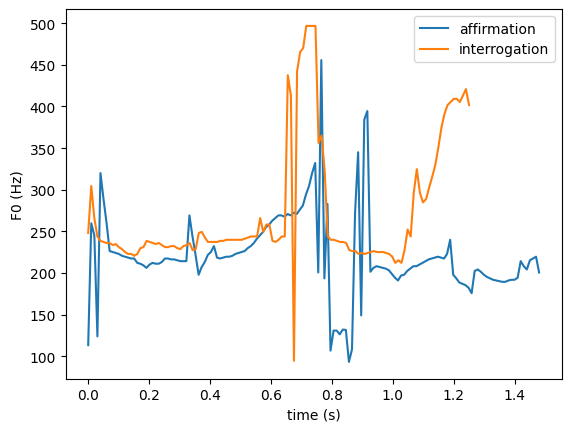

In [37]:
width = 0.02;
overlap = 0.5;
F0_aff = wavpitch("aff.wav", width, overlap);
F0_int = wavpitch("int.wav", width, overlap);
lag = width * (1 - overlap);
len_aff = len(F0_aff);
time_aff = np.linspace(0, lag * len_aff, len_aff);
len_int = len(F0_int);
time_int = np.linspace (0, lag * len_int, len_int);
plt.figure()
plt.plot (time_aff, F0_aff, label="affirmation")
plt.plot(time_int, F0_int, label="interrogation");
plt.xlabel ("time (s)")
plt.ylabel ("F0 (Hz)")
plt.legend()

3. En ce qui concerne $F_0$, quelle est la différence entre la phrase affirmative et la phrase interrogative ?

On remarque que la variation de F0 pour une phrase prononcée sur un ton interrogative est plus significative que pour une phrase affirmative.
Entre 0 et 0.5 s la femme prononce : Emmanuel 
Entre 0.6 et 1.4 s la femme prononce : est la bas (. ou ?)
    
Le "Emmanuel" est prononcé de la même manière donc cela peut expliquer que la fréquence varient de la meme façon.
La suite de la phrase depends de l'intonation choisie. L'interrogatif à intonation montante, c'est à dire en fin de phrase la $F_0$ augmente alors que l'affirmatif l'intonation est constante donc $F_0$ reste constant
(Sur prat, le milieu du signal c'est du bruit, il tente de mesurer un $F_0$ qui n'est pas cohérent du coup c'est pour ça qu'on à un motif bizarre au mileu entre 0.6 et 0.8 s)

4. Échangez vos valeurs de $F_0$ avec vos collègues. Quelle sont les plages de variation de $F_0$ entre les hommes et les femmes ?

Les hommes ont tendance à avoir une fréquence fondamentale  plus basse, généralement entre 100 et 150 Hertz, tandis que les femmes ont une fréquence fondamentale plus élevée, typiquement entre 200 et 300 Hertz. (Analyse sur jupyter de nos audios comparaison avec Mael, Marsien, Sara, Lina et moi même et vérification sur pratt). Les valeurs obtenues sont cohérentes car de manière générale les femmes ont tendance à avoir une voix plus aigue que les hommes.

5. À votre avis, pourquoi la phrase « Emmanuel est là-bas » a été choisie pour ce TP ?

Peut être pour plusieurs raisons : - phrase contient plusieurs voyelles nous indique des informations sur la position de la bouche et la langue tout au long de la phrase si on souhaite connaitre F0 a une articulation donnée? - cette phrase permets de se rendre compte de l'intonation de la parole se qui permets d'obtenir l'evolution du pitch en fonction du temps. Une phrase c'est mieux que un mot ou une syllable pour se rendre compte de la variation du pitch en fonction du temps et permet de se rendre compte de la modification du rythme, débit et timbre.